In [150]:
import pymolpro
import pandas as pd


In [151]:
backend = 'local' 
project_name = 'PX13_methodtest'
parallel = 4

In [152]:
methods = {"HF": "hf",
"MP2": "mp2",
"MP3": "mp3",
"MP4": "mp4",
"PAPT2":"PAPT;MP2",
"PAPT3":"PAPT;MP3",
"PAPT4":"PAPT;MP4",
"CCSD":"CCSD",
"CCSD(T)":"CCSD(T)" }
bases = ['cc-pVDZ','cc-pVTZ']

In [153]:
db = pymolpro.database.load("GMTKN55_PX13")

In [154]:
small=db.subset(open_shell=False,max_electrons=40)
print(small)

GMTKN55 PX13 (closed shell only) (maximum number of electrons 40):

Molecules:
nh3_2_ts: {'geometry': '8\n 2NH3TS (Full point group C2v)\n H 0.673346 0.000000 -0.244115\n H -0.673346 0.000000 -0.244115\n H 0.000000 0.809962 1.821379\n H 0.000000 -0.839127 -1.730643\n N 0.000000 0.000000 -1.165033\n N 0.000000 0.000000 1.208856\n H 0.000000 -0.809962 1.821379\n H 0.000000 0.839127 -1.730643\n', 'description': 'nh3_2_ts'}
nh3_3_ts: {'geometry': '12\n 3NH3TS (Full point group Cs)\n H 0.000000 1.039215 0.000000\n H 0.975536 -0.391735 0.000000\n H -0.718624 -0.750749 0.000000\n H 1.615871 1.288560 0.821991\n H 0.276209 -2.048201 -0.821994\n H -1.974443 0.792779 -0.810562\n N 1.170289 0.899018 0.000000\n N 0.223683 -1.458692 0.000000\n N -1.407141 0.564959 0.000000\n H 0.276209 -2.048201 0.821994\n H -1.974443 0.792779 0.810562\n H 1.615871 1.288560 -0.821991\n', 'description': 'nh3_3_ts'}
h2o_2_ts: {'geometry': '6\n 2H2OTS (Full point group C2h)\n O 0.000000 1.098108 0.000000\n H 0.000000 0

In [155]:
results = {}
for method in methods:
    results[method] = {}
    for basis in bases:
        results[method][basis] = pymolpro.database.run(small, methods[method], basis, location=project_name,
                                                       preamble= 'angstrom' ,backend=backend ,parallel=parallel)
        if results[method][basis].failed: print(method, basis, 'failed', results[method][basis].project_directory)
        
print(results)    

{'HF': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb4fa138df0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb4fa430580>}, 'MP2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb4fa27d1e0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb4fa2f0070>}, 'MP3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb4fa2a6200>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb4fa10d210>}, 'MP4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb4fa10d390>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb4fa10c9d0>}, 'PAPT2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb4fa4b9ff0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb4fa198b80>}, 'PAPT3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb4fa1983d0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb4fa198430>}, 'PAPT4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb4fa201870>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb4fa10f970>}, 'CCSD':

In [156]:
extrapolate={}
for method in  methods:
    extrapolate[method]=pymolpro.database.basis_extrapolate                   (results[method].values(), results["HF"].values())[0]
print(extrapolate)

{'HF': <pymolpro.database.Database object at 0x7fb4fa13a860>, 'MP2': <pymolpro.database.Database object at 0x7fb4fa13bdf0>, 'MP3': <pymolpro.database.Database object at 0x7fb4fa142cb0>, 'MP4': <pymolpro.database.Database object at 0x7fb4fa142c20>, 'PAPT2': <pymolpro.database.Database object at 0x7fb4fa143940>, 'PAPT3': <pymolpro.database.Database object at 0x7fb4fa142c80>, 'PAPT4': <pymolpro.database.Database object at 0x7fb4fa143610>, 'CCSD': <pymolpro.database.Database object at 0x7fb4fa142ce0>, 'CCSD(T)': <pymolpro.database.Database object at 0x7fb4fa142bf0>}


In [157]:
results_with_extrapolation = results
for method in results_with_extrapolation.keys():
    results_with_extrapolation[method]['cc-pV[23]Z'] = extrapolate[method]
results_with_extrapolation
results = results_with_extrapolation

pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['cc-pV[23]Z'] for result in results.values()],results['CCSD(T)']['cc-pV[23]Z'],unit='kJ/mol')
analyse['reaction statistics']

,HF/cc-pV[23]Z,MP2/cc-pV[23]Z,MP3/cc-pV[23]Z,MP4/cc-pV[23]Z,PAPT;MP2/cc-pV[23]Z,PAPT;MP3/cc-pV[23]Z,PAPT;MP4/cc-pV[23]Z,CCSD/cc-pV[23]Z,CCSD(T)/cc-pV[23]Z
MAD,74.71,10.13,13.43,5.08,12.73,12.90,0.35,13.95,0.00
MAXD,88.75,13.49,17.17,7.28,14.77,14.85,0.84,16.56,0.00
RMSD,75.48,10.48,13.60,5.22,12.84,13.01,0.41,14.09,0.00
MSD,74.71,-10.13,13.43,-5.08,12.73,12.90,0.28,13.95,0.00
STDEVD,11.38,2.85,2.28,1.26,1.78,1.79,0.33,2.10,0.00


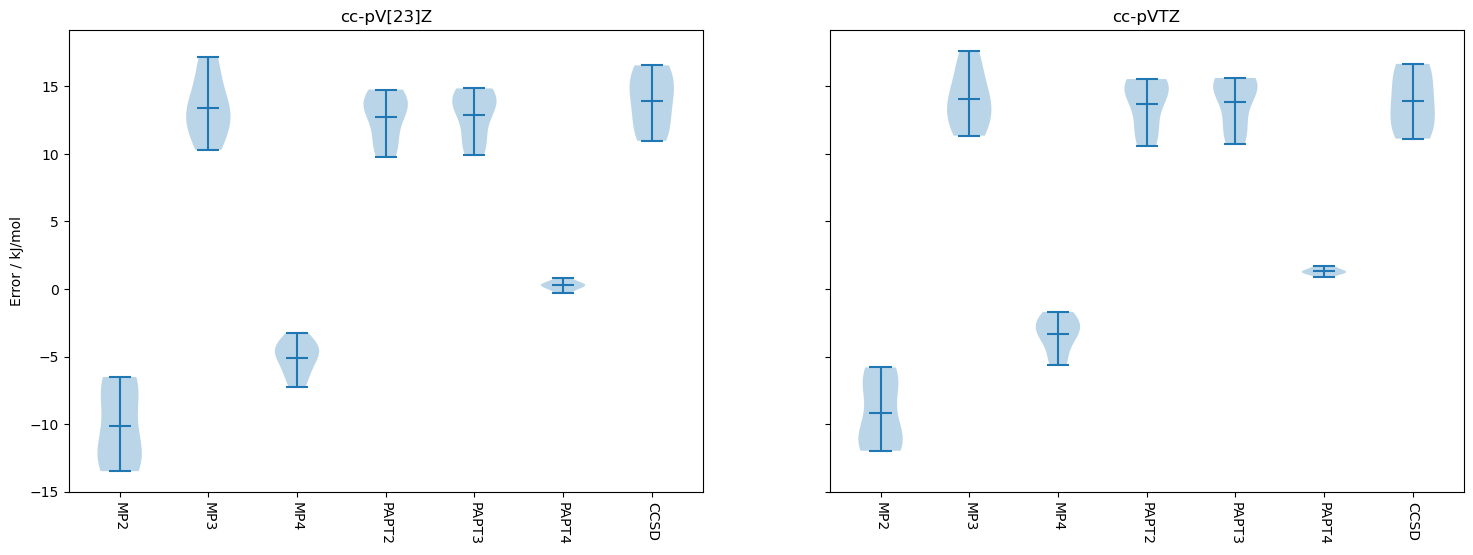

In [158]:
import matplotlib.pyplot as plt

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['cc-pV[23]Z', 'cc-pVTZ']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['cc-pV[23]Z'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")
